In [3]:
#importing the libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr


In [4]:
# Use pandas to read movie dataset as a dataframe
#df=pd.read_csv(r"C:\Users\BOOTCAMP\OneDrive\Documents\Lux Dev\HousePrice_Prediction.csv")
movie_df=pd.read_csv(r"C:\Users\BOOTCAMP\Desktop\Lux Dev\movies_metadata.csv")

C:\Users\BOOTCAMP\AppData\Local\Temp\ipykernel_22024\454731781.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movie_df=pd.read_csv(r"C:\Users\BOOTCAMP\Desktop\Lux Dev\movies_metadata.csv")


movie_df.head()

In [5]:
movie_df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [6]:
print(f"Shape: {movie_df.shape} \n")

Shape: (45466, 24) 



In [7]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

#This dataset is not clean and needs to be worked on before using it.


In [8]:
# drop columns not required in the analysis
movie_df.drop(movie_df.iloc[:, 0:1], axis=1, inplace=True)
#movie_df.drop('adult ','belongs_to_collection','homepage','overview ',axis=1,  inplace=True)

In [9]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4494 non-null   object 
 1   budget                 45466 non-null  object 
 2   genres                 45466 non-null  object 
 3   homepage               7782 non-null   object 
 4   id                     45466 non-null  object 
 5   imdb_id                45449 non-null  object 
 6   original_language      45455 non-null  object 
 7   original_title         45466 non-null  object 
 8   overview               44512 non-null  object 
 9   popularity             45461 non-null  object 
 10  poster_path            45080 non-null  object 
 11  production_companies   45463 non-null  object 
 12  production_countries   45463 non-null  object 
 13  release_date           45379 non-null  object 
 14  revenue                45460 non-null  float64
 15  ru

In [10]:
#
movie_df.drop('belongs_to_collection',axis=1,  inplace=True)

In [11]:
#'overview '
movie_df.drop('homepage',axis=1,  inplace=True)

In [12]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                45466 non-null  object 
 1   genres                45466 non-null  object 
 2   id                    45466 non-null  object 
 3   imdb_id               45449 non-null  object 
 4   original_language     45455 non-null  object 
 5   original_title        45466 non-null  object 
 6   overview              44512 non-null  object 
 7   popularity            45461 non-null  object 
 8   poster_path           45080 non-null  object 
 9   production_companies  45463 non-null  object 
 10  production_countries  45463 non-null  object 
 11  release_date          45379 non-null  object 
 12  revenue               45460 non-null  float64
 13  runtime               45203 non-null  float64
 14  spoken_languages      45460 non-null  object 
 15  status             

In [13]:
movie_df.drop(movie_df.iloc[:, 15:16], axis=1, inplace=True)

In [14]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                45466 non-null  object 
 1   genres                45466 non-null  object 
 2   id                    45466 non-null  object 
 3   imdb_id               45449 non-null  object 
 4   original_language     45455 non-null  object 
 5   original_title        45466 non-null  object 
 6   overview              44512 non-null  object 
 7   popularity            45461 non-null  object 
 8   poster_path           45080 non-null  object 
 9   production_companies  45463 non-null  object 
 10  production_countries  45463 non-null  object 
 11  release_date          45379 non-null  object 
 12  revenue               45460 non-null  float64
 13  runtime               45203 non-null  float64
 14  spoken_languages      45460 non-null  object 
 15  tagline            

In [15]:
movie_df.drop('overview',axis=1,  inplace=True)

In [16]:
movie_df.drop('poster_path',axis=1,  inplace=True)

In [17]:
movie_df.drop('tagline',axis=1,  inplace=True)

In [18]:
movie_df.drop('video',axis=1,  inplace=True)

In [19]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                45466 non-null  object 
 1   genres                45466 non-null  object 
 2   id                    45466 non-null  object 
 3   imdb_id               45449 non-null  object 
 4   original_language     45455 non-null  object 
 5   original_title        45466 non-null  object 
 6   popularity            45461 non-null  object 
 7   production_companies  45463 non-null  object 
 8   production_countries  45463 non-null  object 
 9   release_date          45379 non-null  object 
 10  revenue               45460 non-null  float64
 11  runtime               45203 non-null  float64
 12  spoken_languages      45460 non-null  object 
 13  title                 45460 non-null  object 
 14  vote_average          45460 non-null  float64
 15  vote_count         

In [20]:
movie_df.head()

,budget,genres,id,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,6.5,92.0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,6.1,34.0
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II,5.7,173.0


In [21]:
#Split column into useable number of columns
#',' ',', n=1,
#movie_df[['id', 'name', 'id']] = movie_df['genres'].str.split(delimiter, expand=True)
# custom number of splits
new = movie_df['genres'].str.split(',', n=5, expand=True,)

In [22]:
new.head()

,0,1,2,3,4,5
0,[{'id': 16,'name': 'Animation'},{'id': 35,'name': 'Comedy'},{'id': 10751,'name': 'Family'}]
1,[{'id': 12,'name': 'Adventure'},{'id': 14,'name': 'Fantasy'},{'id': 10751,'name': 'Family'}]
2,[{'id': 10749,'name': 'Romance'},{'id': 35,'name': 'Comedy'}],None,None
3,[{'id': 35,'name': 'Comedy'},{'id': 18,'name': 'Drama'},{'id': 10749,'name': 'Romance'}]
4,[{'id': 35,'name': 'Comedy'}],None,None,None,None


In [23]:
# making separate first name column from new data frame
movie_df["genres_new"] = new[1]

# making separate last name column from new data frame
#data["Last Name"] = new[1]

# Dropping old Name columns
movie_df.drop(columns=["genres"], inplace=True)


In [24]:
# df display
movie_df

,budget,id,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,genres_new
0,30000000,862,tt0114709,en,Toy Story,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0,'name': 'Animation'}
1,65000000,8844,tt0113497,en,Jumanji,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0,'name': 'Adventure'}
2,0,15602,tt0113228,en,Grumpier Old Men,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,6.5,92.0,'name': 'Romance'}
3,16000000,31357,tt0114885,en,Waiting to Exhale,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,6.1,34.0,'name': 'Comedy'}
4,0,11862,tt0113041,en,Father of the Bride Part II,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II,5.7,173.0,'name': 'Comedy'}]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0,439050,tt6209470,fa,رگ خواب,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Subdue,4.0,1.0,'name': 'Drama'}
45462,0,111109,tt2028550,tl,Siglo ng Pagluluwal,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Century of Birthing,9.0,3.0,'name': 'Drama'}]
45463,0,67758,tt0303758,en,Betrayal,0.903007,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Betrayal,3.8,6.0,'name': 'Action'}
45464,0,227506,tt0008536,en,Satana likuyushchiy,0.003503,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Satan Triumphant,0.0,0.0,None


In [25]:
#Extract production_companies column
new1 = movie_df['production_companies'].str.split(',', n=3, expand=True,)
new1.head()

,0,1,2,3
0,[{'name': 'Pixar Animation Studios','id': 3}],None,None
1,[{'name': 'TriStar Pictures','id': 559},{'name': 'Teitler Film',"'id': 2550}, {'name': 'Interscope Communicati..."
2,[{'name': 'Warner Bros.','id': 6194},{'name': 'Lancaster Gate','id': 19464}]
3,[{'name': 'Twentieth Century Fox Film Corporat...,'id': 306}],None,None
4,[{'name': 'Sandollar Productions','id': 5842},{'name': 'Touchstone Pictures','id': 9195}]


In [26]:
# making separate first name column from new data frame
movie_df["production_companies1"] = new1[0]

# making separate last name column from new data frame
#data["Last Name"] = new[1]

# Dropping old Name columns
movie_df.drop(columns=["production_companies"], inplace=True)


In [27]:
# df display
movie_df

,budget,id,imdb_id,original_language,original_title,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,genres_new,production_companies1
0,30000000,862,tt0114709,en,Toy Story,21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0,'name': 'Animation'},[{'name': 'Pixar Animation Studios'
1,65000000,8844,tt0113497,en,Jumanji,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0,'name': 'Adventure'},[{'name': 'TriStar Pictures'
2,0,15602,tt0113228,en,Grumpier Old Men,11.7129,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,6.5,92.0,'name': 'Romance'},[{'name': 'Warner Bros.'
3,16000000,31357,tt0114885,en,Waiting to Exhale,3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,6.1,34.0,'name': 'Comedy'},[{'name': 'Twentieth Century Fox Film Corporat...
4,0,11862,tt0113041,en,Father of the Bride Part II,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II,5.7,173.0,'name': 'Comedy'}],[{'name': 'Sandollar Productions'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0,439050,tt6209470,fa,رگ خواب,0.072051,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Subdue,4.0,1.0,'name': 'Drama'},[]
45462,0,111109,tt2028550,tl,Siglo ng Pagluluwal,0.178241,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Century of Birthing,9.0,3.0,'name': 'Drama'}],[{'name': 'Sine Olivia'
45463,0,67758,tt0303758,en,Betrayal,0.903007,"[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Betrayal,3.8,6.0,'name': 'Action'},[{'name': 'American World Pictures'
45464,0,227506,tt0008536,en,Satana likuyushchiy,0.003503,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Satan Triumphant,0.0,0.0,None,[{'name': 'Yermoliev'


In [28]:
#Extract production_companies1 column
new2 = movie_df['production_companies1'].str.split(':', n=3, expand=True,)
new2.head()

,0,1,2
0,[{'name','Pixar Animation Studios',None
1,[{'name','TriStar Pictures',None
2,[{'name','Warner Bros.',None
3,[{'name','Twentieth Century Fox Film Corporation',None
4,[{'name','Sandollar Productions',None


In [29]:
# making separate first name column from new data frame
movie_df["production_companie2"] = new2[1]

# making separate last name column from new data frame
#data["Last Name"] = new[1]

# Dropping old Name columns
movie_df.drop(columns=["production_companies1"], inplace=True)

In [30]:
#Extract production_companies1 column
new3 = movie_df['production_companie2'].str.split('', n=3, expand=True,)
new3.head()

,0,1,2,3
0,,,',Pixar Animation Studios'
1,,,',TriStar Pictures'
2,,,',Warner Bros.'
3,,,',Twentieth Century Fox Film Corporation'
4,,,',Sandollar Productions'


In [31]:
# making separate first name column from new data frame
movie_df["production_companies3"] = new3[3]

# making separate last name column from new data frame
#data["Last Name"] = new[1]

# Dropping old Name columns
movie_df.drop(columns=["production_companie2"], inplace=True)

In [32]:
# df display
movie_df

,budget,id,imdb_id,original_language,original_title,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,genres_new,production_companies3
0,30000000,862,tt0114709,en,Toy Story,21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0,'name': 'Animation'},Pixar Animation Studios'
1,65000000,8844,tt0113497,en,Jumanji,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0,'name': 'Adventure'},TriStar Pictures'
2,0,15602,tt0113228,en,Grumpier Old Men,11.7129,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,6.5,92.0,'name': 'Romance'},Warner Bros.'
3,16000000,31357,tt0114885,en,Waiting to Exhale,3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,6.1,34.0,'name': 'Comedy'},Twentieth Century Fox Film Corporation'
4,0,11862,tt0113041,en,Father of the Bride Part II,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II,5.7,173.0,'name': 'Comedy'}],Sandollar Productions'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0,439050,tt6209470,fa,رگ خواب,0.072051,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Subdue,4.0,1.0,'name': 'Drama'},None
45462,0,111109,tt2028550,tl,Siglo ng Pagluluwal,0.178241,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Century of Birthing,9.0,3.0,'name': 'Drama'}],Sine Olivia'
45463,0,67758,tt0303758,en,Betrayal,0.903007,"[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Betrayal,3.8,6.0,'name': 'Action'},American World Pictures'
45464,0,227506,tt0008536,en,Satana likuyushchiy,0.003503,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Satan Triumphant,0.0,0.0,None,Yermoliev'


In [33]:
#Extract genres_new column
new4 = movie_df['genres_new'].str.split('', n=11, expand=True,)
new4.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,,,',n,a,m,e,',:,,',Animation'}
1,,,',n,a,m,e,',:,,',Adventure'}
2,,,',n,a,m,e,',:,,',Romance'}
3,,,',n,a,m,e,',:,,',Comedy'}
4,,,',n,a,m,e,',:,,',Comedy'}]


In [34]:
# making separate first name column from new data frame
movie_df["genres"] = new4[11]

# making separate last name column from new data frame
#data["Last Name"] = new[1]

# Dropping old Name columns
movie_df.drop(columns=["genres_new"], inplace=True)


In [35]:
# df display
movie_df

,budget,id,imdb_id,original_language,original_title,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,production_companies3,genres
0,30000000,862,tt0114709,en,Toy Story,21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0,Pixar Animation Studios',Animation'}
1,65000000,8844,tt0113497,en,Jumanji,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0,TriStar Pictures',Adventure'}
2,0,15602,tt0113228,en,Grumpier Old Men,11.7129,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,6.5,92.0,Warner Bros.',Romance'}
3,16000000,31357,tt0114885,en,Waiting to Exhale,3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,6.1,34.0,Twentieth Century Fox Film Corporation',Comedy'}
4,0,11862,tt0113041,en,Father of the Bride Part II,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II,5.7,173.0,Sandollar Productions',Comedy'}]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0,439050,tt6209470,fa,رگ خواب,0.072051,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Subdue,4.0,1.0,None,Drama'}
45462,0,111109,tt2028550,tl,Siglo ng Pagluluwal,0.178241,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Century of Birthing,9.0,3.0,Sine Olivia',Drama'}]
45463,0,67758,tt0303758,en,Betrayal,0.903007,"[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Betrayal,3.8,6.0,American World Pictures',Action'}
45464,0,227506,tt0008536,en,Satana likuyushchiy,0.003503,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Satan Triumphant,0.0,0.0,Yermoliev',None


In [36]:
#Extract production country new column

prod_country = movie_df['production_countries'].str.split(':', n=2, expand=True)
prod_country.head()


,0,1,2
0,[{'iso_3166_1',"'US', 'name'",'United States of America'}]
1,[{'iso_3166_1',"'US', 'name'",'United States of America'}]
2,[{'iso_3166_1',"'US', 'name'",'United States of America'}]
3,[{'iso_3166_1',"'US', 'name'",'United States of America'}]
4,[{'iso_3166_1',"'US', 'name'",'United States of America'}]


#making separate production contries column from new data frame
movie_df['production_country'] = prod_country[2]

# Dropping old Name columns
movie_df.drop(columns=["'production_countries'"], inplace=True)

In [37]:
#Extract production_country column by removing the college brackets
#new4 = movie_df['genres_new'].str.split('', n=11, expand=True,)
#new4.head()
production_country= movie_df['production_countries'].str.split("}", n=2, expand=True)
production_country.head()

,0,1,2
0,"[{'iso_3166_1': 'US', 'name': 'United States o...",],None
1,"[{'iso_3166_1': 'US', 'name': 'United States o...",],None
2,"[{'iso_3166_1': 'US', 'name': 'United States o...",],None
3,"[{'iso_3166_1': 'US', 'name': 'United States o...",],None
4,"[{'iso_3166_1': 'US', 'name': 'United States o...",],None



#making separate production contries column from new data frame
movie_df['production_countries'] = production_country[0]

# Dropping old Name columns
movie_df.drop(columns=["'production_countries'"], inplace=True)

In [38]:
# df display
movie_df

,budget,id,imdb_id,original_language,original_title,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,production_companies3,genres
0,30000000,862,tt0114709,en,Toy Story,21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0,Pixar Animation Studios',Animation'}
1,65000000,8844,tt0113497,en,Jumanji,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0,TriStar Pictures',Adventure'}
2,0,15602,tt0113228,en,Grumpier Old Men,11.7129,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,6.5,92.0,Warner Bros.',Romance'}
3,16000000,31357,tt0114885,en,Waiting to Exhale,3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,6.1,34.0,Twentieth Century Fox Film Corporation',Comedy'}
4,0,11862,tt0113041,en,Father of the Bride Part II,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II,5.7,173.0,Sandollar Productions',Comedy'}]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0,439050,tt6209470,fa,رگ خواب,0.072051,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Subdue,4.0,1.0,None,Drama'}
45462,0,111109,tt2028550,tl,Siglo ng Pagluluwal,0.178241,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Century of Birthing,9.0,3.0,Sine Olivia',Drama'}]
45463,0,67758,tt0303758,en,Betrayal,0.903007,"[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Betrayal,3.8,6.0,American World Pictures',Action'}
45464,0,227506,tt0008536,en,Satana likuyushchiy,0.003503,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Satan Triumphant,0.0,0.0,Yermoliev',None


In [39]:
#Separating spoken language column
new = movie_df['spoken_languages'].str.split('', n=30, expand=True,)
new.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,,[,{,',i,s,o,_,6,3,...,,',n,a,m,e,',:,,'English'}]
1,,[,{,',i,s,o,_,6,3,...,,',n,a,m,e,',:,,"'English'}, {'iso_639_1': 'fr', 'name': 'Franç..."
2,,[,{,',i,s,o,_,6,3,...,,',n,a,m,e,',:,,'English'}]
3,,[,{,',i,s,o,_,6,3,...,,',n,a,m,e,',:,,'English'}]
4,,[,{,',i,s,o,_,6,3,...,,',n,a,m,e,',:,,'English'}]


In [40]:
# making separate oldlanguage column from new data frame
movie_df["spoken_languagesnew"] = new[30]

# Dropping old language columns
movie_df.drop(columns=["spoken_languages"], inplace=True)

movie_df

,budget,id,imdb_id,original_language,original_title,popularity,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,production_companies3,genres,spoken_languagesnew
0,30000000,862,tt0114709,en,Toy Story,21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,Pixar Animation Studios',Animation'},'English'}]
1,65000000,8844,tt0113497,en,Jumanji,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,TriStar Pictures',Adventure'},"'English'}, {'iso_639_1': 'fr', 'name': 'Franç..."
2,0,15602,tt0113228,en,Grumpier Old Men,11.7129,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,Warner Bros.',Romance'},'English'}]
3,16000000,31357,tt0114885,en,Waiting to Exhale,3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,Twentieth Century Fox Film Corporation',Comedy'},'English'}]
4,0,11862,tt0113041,en,Father of the Bride Part II,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,Sandollar Productions',Comedy'}],'English'}]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0,439050,tt6209470,fa,رگ خواب,0.072051,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,Subdue,4.0,1.0,None,Drama'},'فارسی'}]
45462,0,111109,tt2028550,tl,Siglo ng Pagluluwal,0.178241,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,Century of Birthing,9.0,3.0,Sine Olivia',Drama'}],''}]
45463,0,67758,tt0303758,en,Betrayal,0.903007,"[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,Betrayal,3.8,6.0,American World Pictures',Action'},'English'}]
45464,0,227506,tt0008536,en,Satana likuyushchiy,0.003503,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,Satan Triumphant,0.0,0.0,Yermoliev',None,None


In [41]:
#Separating spoken language column
new = movie_df['spoken_languagesnew'].str.split('}', n=3, expand=True,)
new.head()

,0,1,2,3
0,'English',],None,None
1,'English',", {'iso_639_1': 'fr', 'name': 'Français'",],None
2,'English',],None,None
3,'English',],None,None
4,'English',],None,None


In [42]:
# making separate old language column from new data frame
movie_df["spoken_languages"] = new[0]

# Dropping old language columns
movie_df.drop(columns=["spoken_languagesnew"], inplace=True)

movie_df

,budget,id,imdb_id,original_language,original_title,popularity,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,production_companies3,genres,spoken_languages
0,30000000,862,tt0114709,en,Toy Story,21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,Pixar Animation Studios',Animation'},'English'
1,65000000,8844,tt0113497,en,Jumanji,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,TriStar Pictures',Adventure'},'English'
2,0,15602,tt0113228,en,Grumpier Old Men,11.7129,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,Warner Bros.',Romance'},'English'
3,16000000,31357,tt0114885,en,Waiting to Exhale,3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,Twentieth Century Fox Film Corporation',Comedy'},'English'
4,0,11862,tt0113041,en,Father of the Bride Part II,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,Sandollar Productions',Comedy'}],'English'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0,439050,tt6209470,fa,رگ خواب,0.072051,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,Subdue,4.0,1.0,None,Drama'},'فارسی'
45462,0,111109,tt2028550,tl,Siglo ng Pagluluwal,0.178241,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,Century of Birthing,9.0,3.0,Sine Olivia',Drama'}],''
45463,0,67758,tt0303758,en,Betrayal,0.903007,"[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,Betrayal,3.8,6.0,American World Pictures',Action'},'English'
45464,0,227506,tt0008536,en,Satana likuyushchiy,0.003503,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,Satan Triumphant,0.0,0.0,Yermoliev',None,None


In [43]:
#Remove college bracket from production_country column
new = movie_df['production_country'].str.split('}', n=3, expand=True,)
new.head()

# making separate production_country column from new data frame
movie_df["production_countries"] = new[0]

# Dropping old production_country columns
movie_df.drop(columns=["production_country"], inplace=True)

movie_df

KeyError: 'production_country'

In [ ]:
#Remove college bracket from genres column
new = movie_df['genres'].str.split('}', n=3, expand=True,)
new.head()

# making separate genres column from new data frame
movie_df["genre"] = new[0]

# Dropping old genres columns
movie_df.drop(columns=["genres"], inplace=True)

movie_df

In [ ]:
#Remove remaining special characters from the data set

spec_chars = ["!",'"',"'","(",")",
              "*","+",",","-",".","/",":",";"
              ,"[","\\","]",
              "`","{","}","–"]
for char in spec_chars:
    movie_df['production_countries'] = movie_df['production_countries'].str.replace(char, ' ')
    
movie_df.head()

In [ ]:
# Removing white spoace between the the strings
movie_df['production_countries']= movie_df['production_countries'].str.split().str.join(" ")
movie_df.head()

In [44]:
#Removing remaing special characters from column named 'production_companies3'

spec_chars = ["!",'"',"'","(",")",
              "*","+",",","-",".","/",":",";"
              ,"[","\\","]",
              "`","{","}","–"]
for char in spec_chars:
    movie_df['production_companies3'] = movie_df['production_companies3'].str.replace(char, ' ')

movie_df['production_companies3']= movie_df['production_companies3'].str.split().str.join(" ")
movie_df.head()

C:\Users\BOOTCAMP\AppData\Local\Temp\ipykernel_22024\277451333.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_df['production_companies3'] = movie_df['production_companies3'].str.replace(char, ' ')


,budget,id,imdb_id,original_language,original_title,popularity,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,production_companies3,genres,spoken_languages
0,30000000,862,tt0114709,en,Toy Story,21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,Pixar Animation Studios,Animation'},'English'
1,65000000,8844,tt0113497,en,Jumanji,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,TriStar Pictures,Adventure'},'English'
2,0,15602,tt0113228,en,Grumpier Old Men,11.7129,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,Warner Bros,Romance'},'English'
3,16000000,31357,tt0114885,en,Waiting to Exhale,3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,Twentieth Century Fox Film Corporation,Comedy'},'English'
4,0,11862,tt0113041,en,Father of the Bride Part II,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,Sandollar Productions,Comedy'}],'English'


In [45]:
#Removing remaing special characters from column named spoken_languages and genre

spec_chars = ["!",'"',"'","(",")",
              "*","+",",","-",".","/",":",";"
              ,"[","\\","]",
              "`","{","}","–"]
for char in spec_chars:
    movie_df['spoken_languages'] = movie_df['spoken_languages'].str.replace(char, ' ')
    
# Removing white spoace between the the strings
movie_df['spoken_languages']= movie_df['spoken_languages'].str.split().str.join(" ")
movie_df.head()

C:\Users\BOOTCAMP\AppData\Local\Temp\ipykernel_22024\1866320944.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_df['spoken_languages'] = movie_df['spoken_languages'].str.replace(char, ' ')


,budget,id,imdb_id,original_language,original_title,popularity,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,production_companies3,genres,spoken_languages
0,30000000,862,tt0114709,en,Toy Story,21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,Pixar Animation Studios,Animation'},English
1,65000000,8844,tt0113497,en,Jumanji,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,TriStar Pictures,Adventure'},English
2,0,15602,tt0113228,en,Grumpier Old Men,11.7129,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,Warner Bros,Romance'},English
3,16000000,31357,tt0114885,en,Waiting to Exhale,3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,Twentieth Century Fox Film Corporation,Comedy'},English
4,0,11862,tt0113041,en,Father of the Bride Part II,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,Sandollar Productions,Comedy'}],English


In [78]:
#Removing remaing special characters from column named spoken_languages and genre

spec_chars = ["!",'"',"'","(",")",
              "*","+",",","-",".","/",":",";"
              ,"[","\\","]",
              "`","{","}","–"]
for char in spec_chars:
    movie_df['genres'] = movie_df['genres'].str.replace(char, ' ')
    
# Removing white spoace between the the strings
movie_df['genres']= movie_df['genres'].str.split().str.join(" ")
movie_df.head()

C:\Users\BOOTCAMP\AppData\Local\Temp\ipykernel_22024\2903015805.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['genres'] = movie_df['genres'].str.replace(char, ' ')
C:\Users\BOOTCAMP\AppData\Local\Temp\ipykernel_22024\2903015805.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_df['genres'] = movie_df['genres'].str.replace(char, ' ')
C:\Users\BOOTCAMP\AppData\Local\Temp\ipykernel_22024\2903015805.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,budget,id,imdb_id,original_language,original_title,popularity,production_countries,revenue,runtime,title,vote_average,vote_count,production_companies3,genres,spoken_languages,release_years,release_months
0,30000000.0,862,tt0114709,en,Toy Story,21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,81.0,Toy Story,7.7,5415.0,Pixar Animation Studios,Animation,English,1995,10
1,65000000.0,8844,tt0113497,en,Jumanji,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,104.0,Jumanji,6.9,2413.0,TriStar Pictures,Adventure,English,1995,12
2,0.0,15602,tt0113228,en,Grumpier Old Men,11.7129,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,101.0,Grumpier Old Men,6.5,92.0,Warner Bros,Romance,English,1995,12
3,16000000.0,31357,tt0114885,en,Waiting to Exhale,3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",81452156.0,127.0,Waiting to Exhale,6.1,34.0,Twentieth Century Fox Film Corporation,Comedy,English,1995,12
4,0.0,11862,tt0113041,en,Father of the Bride Part II,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",76578911.0,106.0,Father of the Bride Part II,5.7,173.0,Sandollar Productions,Comedy,English,1995,02


In [79]:
#Checking for NAN 
movie_df.isnull().sum()

budget                   0
id                       0
imdb_id                  0
original_language        0
original_title           0
popularity               0
production_countries     0
revenue                  0
runtime                  0
title                    0
vote_average             0
vote_count               0
production_companies3    0
genres                   0
spoken_languages         0
release_years            0
release_months           0
dtype: int64

In [80]:
# Checking the main statistics for every numerical column in our dataset
movie_df.describe()

,budget,revenue,runtime,vote_average,vote_count
count,3.244500e+04,3.244500e+04,32445.000000,32445.000000,32445.000000
mean,5.847989e+06,1.564339e+07,98.010539,5.838274,150.721313
std,2.037907e+07,7.567997e+07,31.816774,1.598087,576.431860
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,88.000000,5.300000,5.000000
50%,0.000000e+00,0.000000e+00,96.000000,6.100000,16.000000
75%,0.000000e+00,0.000000e+00,109.000000,6.800000,58.000000
max,3.800000e+08,2.787965e+09,931.000000,10.000000,14075.000000


In [81]:
# Repalve null values in some float64 columns(revenue,runtime,vote_average,vote_count) with thier mean value
movie_df=movie_df.fillna(movie_df.mean())

C:\Users\BOOTCAMP\AppData\Local\Temp\ipykernel_22024\3478132709.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  movie_df=movie_df.fillna(movie_df.mean())


In [50]:
#Re-checking for NAN 
movie_df.isnull().sum()

budget                       0
id                           0
imdb_id                     17
original_language           11
original_title               0
popularity                   5
production_countries         3
release_date                87
revenue                      0
runtime                      0
title                        6
vote_average                 0
vote_count                   0
production_companies3    11881
genres                    2442
spoken_languages          3835
dtype: int64

In [51]:
movie_df

,budget,id,imdb_id,original_language,original_title,popularity,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,production_companies3,genres,spoken_languages
0,30000000,862,tt0114709,en,Toy Story,21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,Pixar Animation Studios,Animation'},English
1,65000000,8844,tt0113497,en,Jumanji,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,TriStar Pictures,Adventure'},English
2,0,15602,tt0113228,en,Grumpier Old Men,11.7129,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,Warner Bros,Romance'},English
3,16000000,31357,tt0114885,en,Waiting to Exhale,3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,Twentieth Century Fox Film Corporation,Comedy'},English
4,0,11862,tt0113041,en,Father of the Bride Part II,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,Sandollar Productions,Comedy'}],English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0,439050,tt6209470,fa,رگ خواب,0.072051,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,Subdue,4.0,1.0,None,Drama'},فارسی
45462,0,111109,tt2028550,tl,Siglo ng Pagluluwal,0.178241,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,Century of Birthing,9.0,3.0,Sine Olivia,Drama'}],
45463,0,67758,tt0303758,en,Betrayal,0.903007,"[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,Betrayal,3.8,6.0,American World Pictures,Action'},English
45464,0,227506,tt0008536,en,Satana likuyushchiy,0.003503,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,Satan Triumphant,0.0,0.0,Yermoliev,None,None


In [52]:
# Spliting release_date column by delimiter "-"

new = movie_df['release_date'].str.split('-', n=3, expand=True,)
new.head()



,0,1,2
0,1995,10,30
1,1995,12,15
2,1995,12,22
3,1995,12,22
4,1995,02,10


In [97]:
# making separate release_year column from new data frame
movie_df["release_years"] = new[0]

# making separate release_month"column from new data frame
movie_df["release_months"] = new[1]

# Dropping old release_date column
movie_df.drop(columns=["release_date"], inplace=True)

movie_df

KeyError: "['release_date'] not found in axis"

In [82]:
#dropping column release_year
#movie_df = movie_df.dropna(subset=['release_year'])
movie_df.drop('release_years',axis=1,  inplace=True)
movie_df

,budget,id,imdb_id,original_language,original_title,popularity,production_countries,revenue,runtime,title,vote_average,vote_count,production_companies3,genres,spoken_languages,release_months
0,30000000.0,862,tt0114709,en,Toy Story,21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,81.0,Toy Story,7.7,5415.0,Pixar Animation Studios,Animation,English,10
1,65000000.0,8844,tt0113497,en,Jumanji,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,104.0,Jumanji,6.9,2413.0,TriStar Pictures,Adventure,English,12
2,0.0,15602,tt0113228,en,Grumpier Old Men,11.7129,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,101.0,Grumpier Old Men,6.5,92.0,Warner Bros,Romance,English,12
3,16000000.0,31357,tt0114885,en,Waiting to Exhale,3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",81452156.0,127.0,Waiting to Exhale,6.1,34.0,Twentieth Century Fox Film Corporation,Comedy,English,12
4,0.0,11862,tt0113041,en,Father of the Bride Part II,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",76578911.0,106.0,Father of the Bride Part II,5.7,173.0,Sandollar Productions,Comedy,English,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45458,0.0,289923,tt0252966,en,The Burkittsville 7,0.38645,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,30.0,The Burkittsville 7,7.0,1.0,Neptune Salad Entertainment,Horror,English,10
45459,0.0,222848,tt0112613,en,Caged Heat 3000,0.661558,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,85.0,Caged Heat 3000,3.5,1.0,Concorde New Horizons,Science Fiction,English,01
45460,0.0,30840,tt0102797,en,Robin Hood,5.683753,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",0.0,104.0,Robin Hood,5.7,26.0,Westdeutscher Rundfunk WDR,Drama,English,05
45462,0.0,111109,tt2028550,tl,Siglo ng Pagluluwal,0.178241,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",0.0,360.0,Century of Birthing,9.0,3.0,Sine Olivia,Drama,,11


In [83]:
#Re-checking for NAN 
movie_df.isnull().sum()

budget                   0
id                       0
imdb_id                  0
original_language        0
original_title           0
popularity               0
production_countries     0
revenue                  0
runtime                  0
title                    0
vote_average             0
vote_count               0
production_companies3    0
genres                   0
spoken_languages         0
release_months           0
dtype: int64

In [84]:
# Converting columns "budget" and "revenue" to float.
movie_df['budget'] = pd.to_numeric(movie_df['budget'], errors='coerce')
movie_df['revenue'] = pd.to_numeric(movie_df['revenue'], errors='coerce')

In [85]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32445 entries, 0 to 45463
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   budget                 32445 non-null  float64
 1   id                     32445 non-null  object 
 2   imdb_id                32445 non-null  object 
 3   original_language      32445 non-null  object 
 4   original_title         32445 non-null  object 
 5   popularity             32445 non-null  object 
 6   production_countries   32445 non-null  object 
 7   revenue                32445 non-null  float64
 8   runtime                32445 non-null  float64
 9   title                  32445 non-null  object 
 10  vote_average           32445 non-null  float64
 11  vote_count             32445 non-null  float64
 12  production_companies3  32445 non-null  object 
 13  genres                 32445 non-null  object 
 14  spoken_languages       32445 non-null  object 
 15  re

In [86]:
# Dropping remaining rows with null values
movie_df = movie_df.dropna(how='any',axis=0)

In [87]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32445 entries, 0 to 45463
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   budget                 32445 non-null  float64
 1   id                     32445 non-null  object 
 2   imdb_id                32445 non-null  object 
 3   original_language      32445 non-null  object 
 4   original_title         32445 non-null  object 
 5   popularity             32445 non-null  object 
 6   production_countries   32445 non-null  object 
 7   revenue                32445 non-null  float64
 8   runtime                32445 non-null  float64
 9   title                  32445 non-null  object 
 10  vote_average           32445 non-null  float64
 11  vote_count             32445 non-null  float64
 12  production_companies3  32445 non-null  object 
 13  genres                 32445 non-null  object 
 14  spoken_languages       32445 non-null  object 
 15  re

In [88]:
#Reviewing the statistical detal of movie_df
movie_df.describe()

,budget,revenue,runtime,vote_average,vote_count
count,3.244500e+04,3.244500e+04,32445.000000,32445.000000,32445.000000
mean,5.847989e+06,1.564339e+07,98.010539,5.838274,150.721313
std,2.037907e+07,7.567997e+07,31.816774,1.598087,576.431860
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,88.000000,5.300000,5.000000
50%,0.000000e+00,0.000000e+00,96.000000,6.100000,16.000000
75%,0.000000e+00,0.000000e+00,109.000000,6.800000,58.000000
max,3.800000e+08,2.787965e+09,931.000000,10.000000,14075.000000


Exploratory Data Analysis

Distribution of Genres
Let’s start by visualizing the distribution of movie genres. This will help us understand the distribution of user preferences.

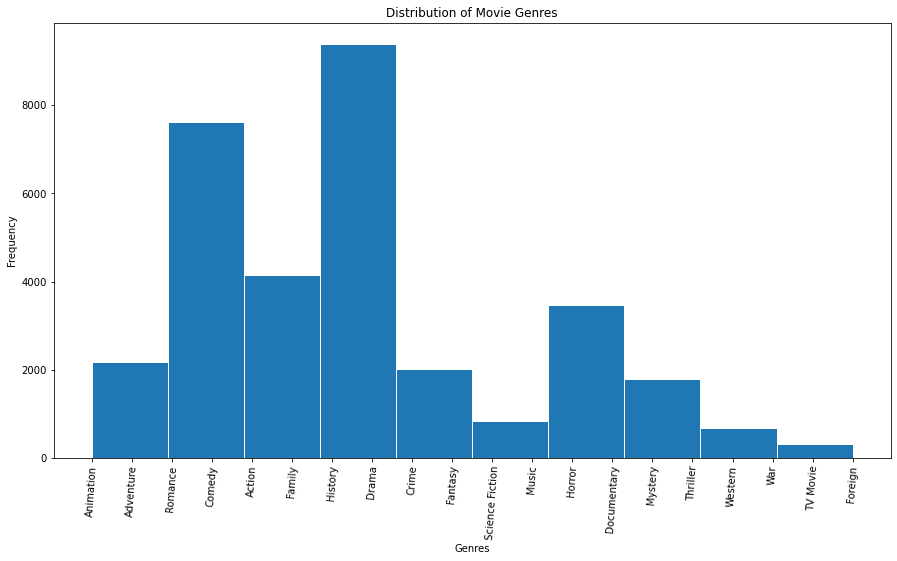

In [89]:
plt.figure(figsize=(15,8))
plt.hist(movie_df['genres'], bins=10, edgecolor='white')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Genres')
plt.xticks(rotation=86)
plt.show()

From the above, it is evident that viewers preferred History and Dramas genres most. 

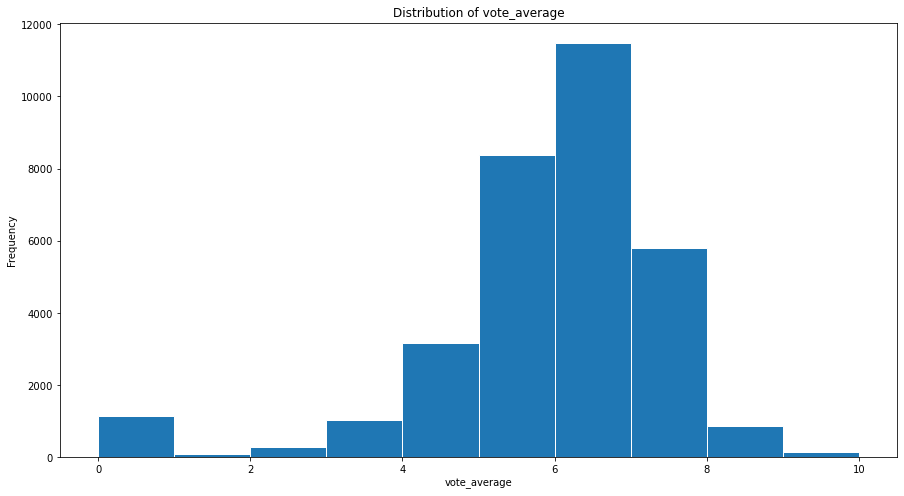

In [90]:
plt.figure(figsize=(15,8))
plt.hist(movie_df['vote_average'], bins=10, edgecolor='white')
plt.xlabel('vote_average')
plt.ylabel('Frequency')
plt.title('Distribution of vote_average')
plt.show()

From the histogram the most "vote_average" for movie_df fall between 5.0 and 8.0.

In [92]:
# Looking at the Top 10 Most Popular Movie
top_movies = movie_df['title'].value_counts().nlargest(10)


In [93]:
top_movies

Alice in Wonderland     9
Cinderella              8
Hamlet                  7
The Three Musketeers    7
Les Misérables          6
Treasure Island         6
The Stranger            6
Mother                  6
Beauty and the Beast    6
A Christmas Carol       6
Name: title, dtype: int64

Most Popular Movies
We could identify the top most popular movies by the number of vote_average they received.
The movie "Alice in the wonderland" came top.

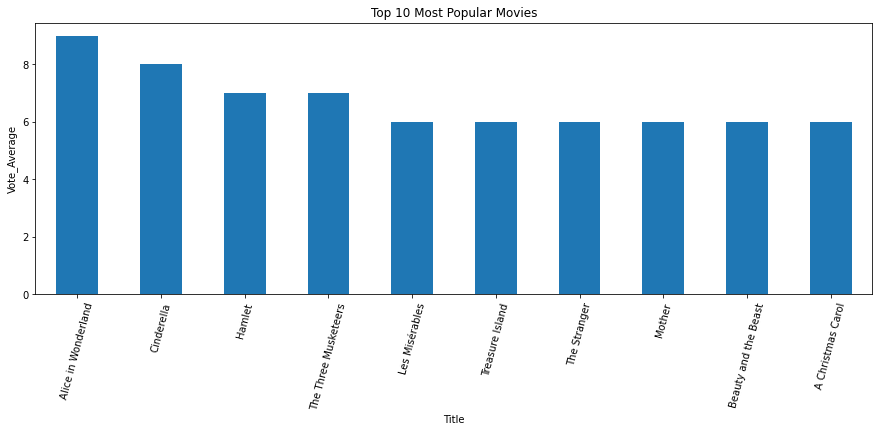

In [94]:
# Most Popular Movies (Top 10)
plt.figure(figsize=(15, 5))
top_movies.plot(kind='bar')
plt.xlabel('Title')
plt.ylabel('Vote_Average')
plt.title('Top 10 Most Popular Movies')
plt.xticks(rotation=75)
plt.show()

Let's explore the highest box-office revenue trend

C:\Users\BOOTCAMP\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\BOOTCAMP\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\BOOTCAMP\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\BOOTCAMP\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24191 (\N{CJK UNIFIED IDEOGRAPH-5E7F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\BOOTCAMP\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24030 (\N{CJK UNIFIED IDEOGRAPH-5DDE}) missing from current font.
  fig.canvas.prin

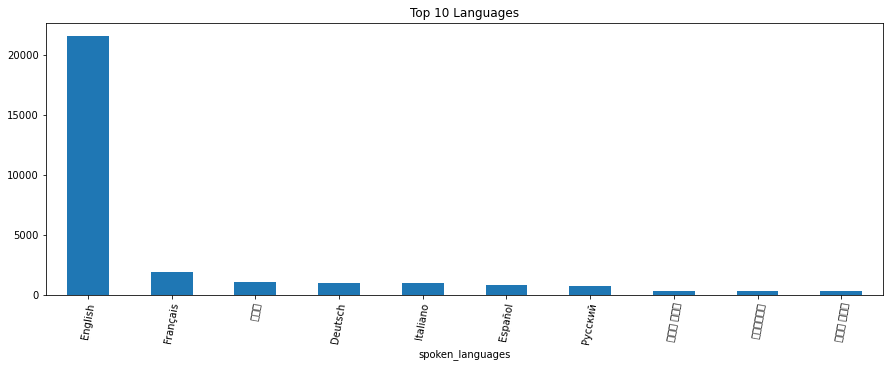

In [98]:
# Movies with Highest revenue (Top 10)
languages = movie_df['spoken_languages'].value_counts().nlargest(10)
plt.figure(figsize=(15, 5))
languages.plot(kind='bar')
plt.xlabel('spoken_languages')
plt.ylabel('')
plt.title('Top 10 Languages')
plt.xticks(rotation=80)
plt.show()

From the above chart, it is clearly shown that movies with "English" as the spoken_langue gross the highest compared to other languages.